<a href="https://colab.research.google.com/github/srinijalanda93/SPR_LAB/blob/main/2448526_LAB9_SPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
states = ['h', 'e', 'l', 'o']
observations = ['O1', 'O2', 'O3', 'O4']

# Transition Matrix A
A = np.array([
    [0.1, 0.6, 0.2, 0.1],
    [0.0, 0.1, 0.7, 0.2],
    [0.0, 0.0, 0.2, 0.8],
    [0.0, 0.0, 0.0, 1.0]
])

# Emission Matrix B
B = np.array([
    [0.9, 0.05, 0.03, 0.02],
    [0.0, 0.9, 0.05, 0.05],
    [0.0, 0.0, 0.9, 0.1],
    [0.0, 0.0, 0.0, 1.0]
])

# Initial probabilities π
pi = np.array([1.0, 0.0, 0.0, 0.0])

# Observation sequence: O1, O2, O3, O4 → encoded as 0,1,2,3
O = [0, 1, 2, 3]

T = len(O)   # number of time steps
N = len(states)  # number of states

# Allocate delta and psi
delta = np.zeros((T, N))
psi = np.zeros((T, N), dtype=int)


In [3]:
# Initialization: delta[0] = π * B[:, O1]
delta[0] = pi * B[:, O[0]]

print("Delta after initialization:\n", delta[0])


Delta after initialization:
 [0.9 0.  0.  0. ]


In [4]:
for t in range(1, T):
    for j in range(N):
        # compute probabilities from all previous states
        temp = delta[t-1] * A[:, j]

        # find best previous state
        psi[t, j] = np.argmax(temp)

        # update delta
        delta[t, j] = np.max(temp) * B[j, O[t]]

print("Delta matrix (trellis):\n", delta)
print("\nPsi matrix (backpointers):\n", psi)


Delta matrix (trellis):
 [[9.00000e-01 0.00000e+00 0.00000e+00 0.00000e+00]
 [4.50000e-03 4.86000e-01 0.00000e+00 0.00000e+00]
 [1.35000e-05 2.43000e-03 3.06180e-01 0.00000e+00]
 [2.70000e-08 1.21500e-05 6.12360e-03 2.44944e-01]]

Psi matrix (backpointers):
 [[0 0 0 0]
 [0 0 0 0]
 [0 1 1 1]
 [0 1 2 2]]


In [5]:
# Final best probability
P_max = np.max(delta[T-1])
last_state = np.argmax(delta[T-1])

# Backtracking
best_path = [last_state]
for t in range(T-1, 0, -1):
    best_path.insert(0, psi[t, best_path[0]])

decoded_phonemes = [states[i] for i in best_path]

print("Most likely phoneme sequence:", decoded_phonemes)
print("Probability of best sequence:", P_max)


Most likely phoneme sequence: ['h', 'e', 'l', 'o']
Probability of best sequence: 0.24494400000000002


In [6]:
df = pd.DataFrame(delta, columns=states, index=[f"t={i+1}" for i in range(T)])
df


,h,e,l,o
t=1,9.000000e-01,0.000000,0.000000,0.000000
t=2,4.500000e-03,0.486000,0.000000,0.000000
t=3,1.350000e-05,0.002430,0.306180,0.000000
t=4,2.700000e-08,0.000012,0.006124,0.244944


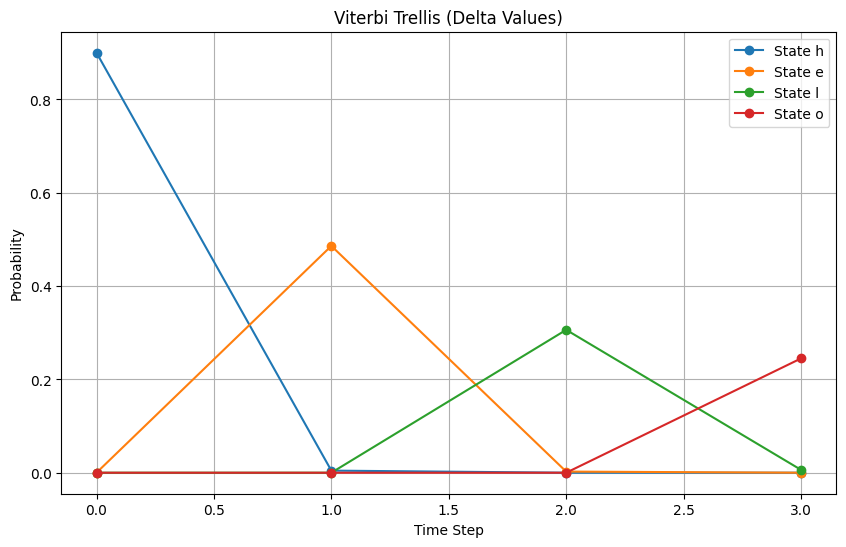

In [7]:
plt.figure(figsize=(10,6))

for i, st in enumerate(states):
    plt.plot(delta[:, i], marker='o', label=f"State {st}")

plt.title("Viterbi Trellis (Delta Values)")
plt.xlabel("Time Step")
plt.ylabel("Probability")
plt.grid(True)
plt.legend()
plt.show()


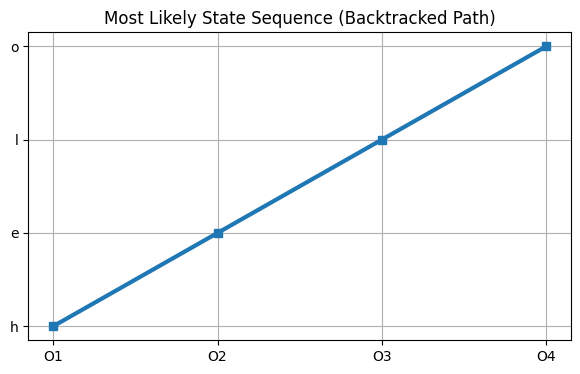

In [8]:
plt.figure(figsize=(7,4))
plt.plot(best_path, marker='s', linewidth=3)
plt.yticks(range(N), states)
plt.xticks(range(T), ['O1','O2','O3','O4'])
plt.title("Most Likely State Sequence (Backtracked Path)")
plt.grid(True)
plt.show()
